In [38]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,Dropout
from matplotlib import pyplot as plt

In [39]:
(train_data,train_target),(test_data,test_target) = mnist.load_data() #load data

In [40]:
new_train_target=np_utils.to_categorical(train_target) # convert to categorical form
new_test_target=np_utils.to_categorical(test_target)

print(train_target[:10])
print(new_train_target[:10])

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [41]:
train_data_new=train_data/255.0 # normalize the data
train_data_new=np.reshape(train_data_new,(train_data_new.shape[0],28,28,1)) # reshape data to a fixed size (28x28)
train_data_new.shape

(60000, 28, 28, 1)

In [42]:
test_data_new=test_data/255.0 # normalize the data
test_data_new=np.reshape(test_data_new,(test_data_new.shape[0],28,28,1)) # reshape data to a fixed size (28x28)

In [43]:
model=Sequential()

model.add(Conv2D(256,(3,3),input_shape=train_data_new.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(10,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 256)       2560      
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 128)       295040    
_________________________________________________________________
activation_3 (Activation)    (None, 11, 11, 128)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)             

In [45]:
history=model.fit(train_data_new,new_train_target,validation_data=(test_data_new,new_test_target),epochs=2) # train the model

Epoch 1/2
1875/1875 [==============================] - 339s 181ms/step - loss: 0.1487 - accuracy: 0.9530 - val_loss: 0.0420 - val_accuracy: 0.9857
Epoch 2/2
1875/1875 [==============================] - 342s 182ms/step - loss: 0.0598 - accuracy: 0.9814 - val_loss: 0.0368 - val_accuracy: 0.9881


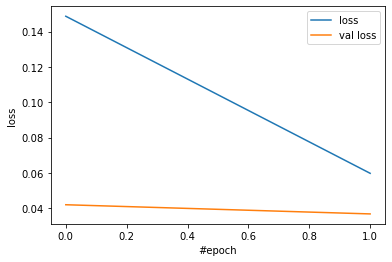

In [46]:
plt.plot(model.history.history['loss'],label='loss')
plt.plot(model.history.history['val_loss'],label='val loss')
plt.legend()
plt.xlabel('#epoch')
plt.ylabel('loss')
plt.show()

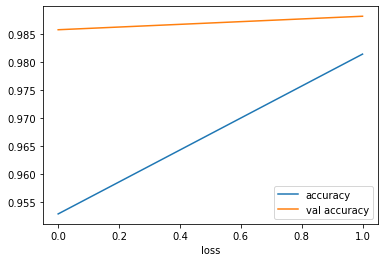

In [47]:
plt.plot(model.history.history['accuracy'],label='accuracy')
plt.plot(model.history.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.xlabel('#epoch')
plt.xlabel('loss')
plt.show()

In [49]:
import cv2, os

data_path=r'D:\Semester 08\Intelligent systems design\2.1\my_test_images'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict={} #empty dictionary

for i in range(len(categories)):
    label_dict[categories[i]]=labels[i]

print(label_dict)
print(categories)
print(labels)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [50]:
img_size=28

data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        #cv2.imshow('LIVE',img)
        #cv2.waitKey(100)
        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            _,inverted = cv2.threshold(resized,150,255,cv2.THRESH_BINARY_INV)
            kernel = np.ones((3,3),np.uint8)
            dilated = cv2.dilate(inverted,kernel,iterations = 1)
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(dilated)
            target.append(label_dict[category])
            
        except Exception as e:
            print(e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

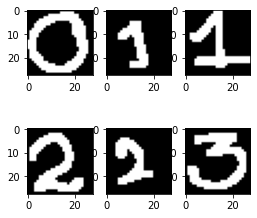

In [51]:
w=10
h=10

fig=plt.figure(figsize=(4,4))

columns=3
rows=2

for i in range(1, columns*rows+1):
    fig.add_subplot(rows,columns,i)
    plt.imshow(data[i],cmap=plt.get_cmap('gray'))
plt.show()

In [52]:
data=np.array(data)
target=np.array(target)
#target_new=np_utils.to_categorical(target)
print(data.shape,target.shape)

(20, 28, 28) (20,)


In [53]:
predict=[]

for i in range(len(data)):
    
    label_predict = np.argmax(model.predict(data[i].reshape(1,28,28,1)/255), axis=-1)
    predict.append(label_predict)

predict = np.array(predict).flatten()
  
print(target.shape, predict.shape)

(20,) (20,)


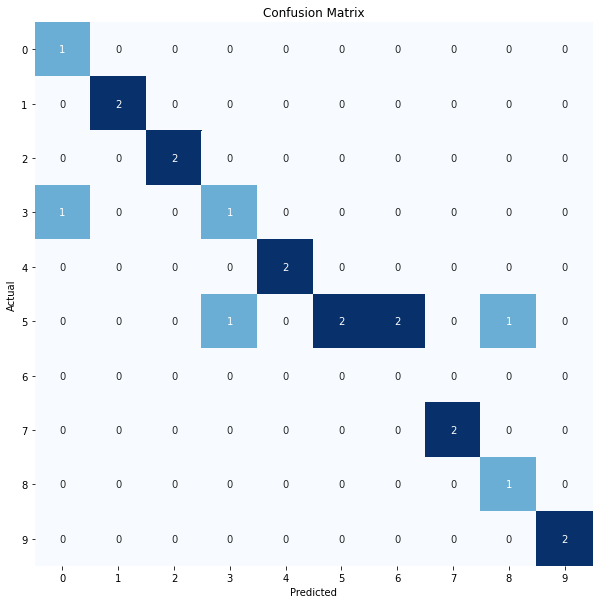

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

ticklabels = ['0','1','2','3','4','5','6','7','8','9']
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
cm = confusion_matrix(predict,target ) 
sns.heatmap(cm, annot=True, cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix') 
ax.set_xlabel('Predicted') 
ax.set_ylabel('Actual') 
ax.set_xticklabels(ticklabels) 
ax.set_yticklabels(ticklabels, rotation=0)
plt.show()

In [58]:
model.save_weights('CNN-MNIST.h5')